In [1]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np

# Read in the GeoPackage file for 2021
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)

# List of TIFF file paths
tiff_files = [
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Biddeford Pool.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Brave Boat.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Cousins River.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Goochs Beach.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Gooch's Beach.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Goosefare.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Little River.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Marshall Point.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Ogunquit.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Scarborough.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Spurwink.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\Webhannet.tif",
    r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\DEM\2020\TIF\CLIPPED\Singlemarshes\reprojected\York River.tif"
]

# Function to extract elevation from TIFF using rasterio
def extract_elevation_from_tiff(tiff_path, polygon):
    try:
        with rasterio.open(tiff_path) as src:
            # Mask raster by polygon
            out_image, out_transform = mask(src, [polygon], crop=True)
            # Calculate mean elevation within the polygon
            elevation_value = np.mean(out_image)
            return elevation_value
    except ValueError:
        # Return NaN if polygon does not overlap with raster
        return np.nan

# Iterate over each TIFF file
for tiff_file in tiff_files:
    tiff_name = tiff_file.split('\\')[-1].split('.')[0]
    # Extract elevation data from TIFF for each polygon in gdf_2021
    gdf_2021['Elevation_' + tiff_name] = gdf_2021['geometry'].apply(lambda x: extract_elevation_from_tiff(tiff_file, x))

# Display the updated GeoDataFrame
print(gdf_2021)


      PoolType        area                                        layer  \
0           PP  741.074988  vector_1_2021_mp_UPDATED — vector_1_2021_mp   
1           PP  390.778142  vector_1_2021_mp_UPDATED — vector_1_2021_mp   
2           IP  457.909779  vector_1_2021_mp_UPDATED — vector_1_2021_mp   
3           IP  328.639773  vector_1_2021_mp_UPDATED — vector_1_2021_mp   
4           IP  138.715715  vector_1_2021_mp_UPDATED — vector_1_2021_mp   
...        ...         ...                                          ...   
14151       IP   32.166648                                          NaN   
14152       IP   11.346725                                          NaN   
14153       IP    4.088163                                          NaN   
14154       IP    3.625073                                          NaN   
14155       IP    8.487920                                          NaN   

                                                    path            ID  \
0      D:/Users/Classroom

In [31]:
import geopandas as gpd
import pandas as pd

# Read in the GeoPackage file
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)

# Extract first 2 characters of ID
gdf_2021['ID'] = gdf_2021['ID'].str[:2]

# Calculate median size of pools grouped by ID_prefix and PoolType
median_sizes = gdf_2021.groupby(['ID', 'PoolType'])['area'].median().reset_index()

# Rename the aggregation column to 'Median Pool Size'
median_sizes.rename(columns={'area': 'Median Pool Size'}, inplace=True)

# Print the DataFrame
print(median_sizes)


    ID PoolType  Median Pool Size
0   10       IP         10.249134
1   10       MS       2099.023709
2   10       PP         74.639276
3   11       IP         14.601402
4   11       MS       2251.986781
5   11       PP         45.882681
6   12       IP         16.942167
7   12       MS       3298.783614
8   1_       IP         14.250728
9   1_       MS       1993.512354
10  1_       PP         21.599604
11  2_       IP         15.168376
12  2_       MS       3053.418052
13  2_       PP         40.183987
14  3_       IP         20.459461
15  3_       MS       2224.285771
16  3_       PP         61.734371
17  4_       IP         19.765328
18  4_       MS       1677.044331
19  4_       PP        105.317532
20  5_       IP         27.164133
21  5_       MS       4478.882089
22  5_       PP         75.393032
23  6_       IP         11.361812
24  6_       MS       3139.826353
25  6_       PP         20.806065
26  7_       IP         17.693911
27  7_       MS       2383.865908
28  7_       P

In [32]:
# Print column headings
print(median_sizes.columns)

Index(['ID', 'PoolType', 'Median Pool Size'], dtype='object')


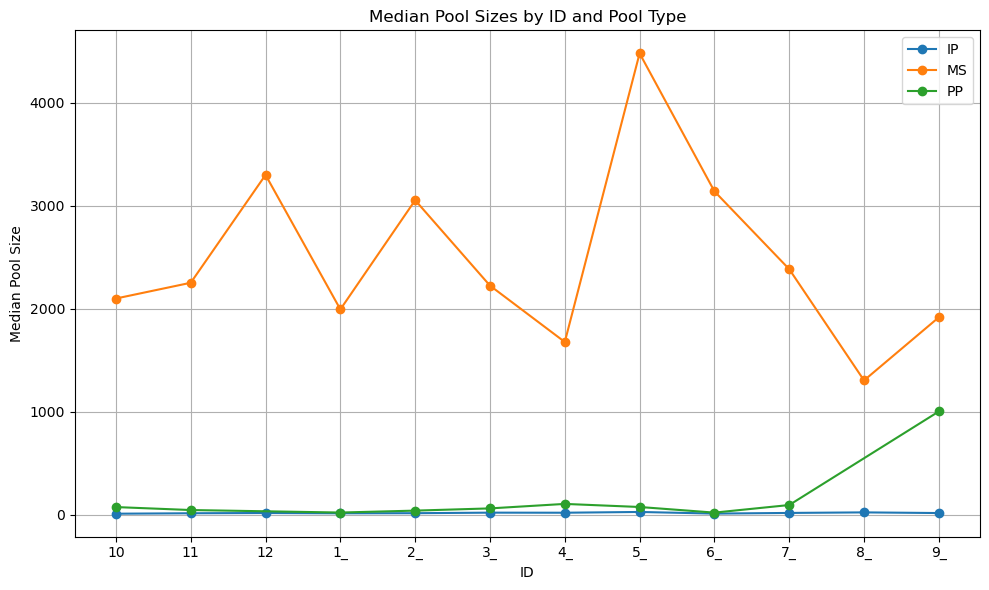

In [34]:
# Plotting median pool sizes
plt.figure(figsize=(10, 6))
for pool_type, group in median_sizes.groupby('PoolType'):
    plt.plot(group['ID'], group['Median Pool Size'], marker='o', linestyle='-', label=pool_type)

plt.xlabel('ID')
plt.ylabel('Median Pool Size')
plt.title('Median Pool Sizes by ID and Pool Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


    ID PoolType  Median Pool Size
0   10       IP         10.249134
1   10       MS       2099.023709
2   10       PP         74.639276
3   11       IP         14.601402
4   11       MS       2251.986781
5   11       PP         45.882681
6   12       IP         16.942167
7   12       MS       3298.783614
8   1_       IP         14.250728
9   1_       MS       1993.512354
10  1_       PP         21.599604
11  2_       IP         15.168376
12  2_       MS       3053.418052
13  2_       PP         40.183987
14  3_       IP         20.459461
15  3_       MS       2224.285771
16  3_       PP         61.734371
17  4_       IP         19.765328
18  4_       MS       1677.044331
19  4_       PP        105.317532
20  5_       IP         27.164133
21  5_       MS       4478.882089
22  5_       PP         75.393032
23  6_       IP         11.361812
24  6_       MS       3139.826353
25  6_       PP         20.806065
26  7_       IP         17.693911
27  7_       MS       2383.865908
28  7_       P

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (10,).

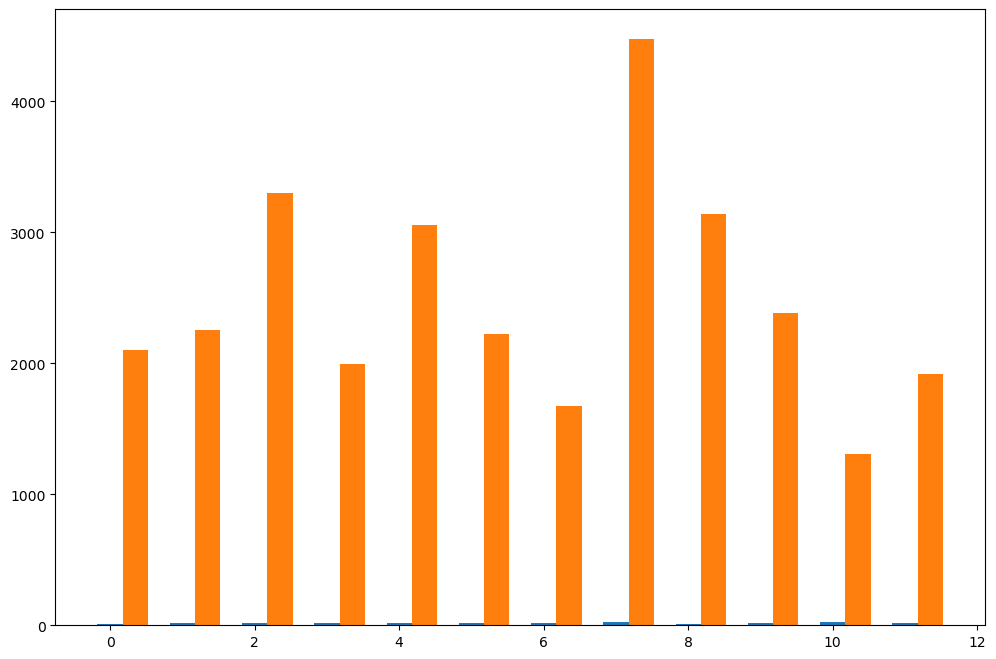

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read in the GeoPackage file
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)

# Extract first 2 characters of ID
gdf_2021['ID'] = gdf_2021['ID'].str[:2]

# Calculate median size of pools grouped by ID and PoolType
median_sizes = gdf_2021.groupby(['ID', 'PoolType'])['area'].median().reset_index()
median_sizes.rename(columns={'area': 'Median Pool Size'}, inplace=True)

# Print the DataFrame and column headings
print(median_sizes)
print(median_sizes.columns)

# Plotting median pool sizes as a bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35

# Convert 'ID' to string to avoid concatenation issues
ids = median_sizes['ID'].astype(str).unique()
pool_types = median_sizes['PoolType'].unique()

# Iterate over each PoolType and plot bars for each ID
for i, pool_type in enumerate(pool_types):
    subset = median_sizes[median_sizes['PoolType'] == pool_type]
    x_positions = range(len(ids))  # Generate x positions for bars
    plt.bar([x + i * bar_width for x in x_positions], subset['Median Pool Size'], bar_width, label=pool_type)

plt.xlabel('ID')
plt.ylabel('Median Pool Size')
plt.title('Median Pool Sizes by ID and Pool Type')
plt.xticks([i + (len(pool_types) - 1) * bar_width / 2 for i in x_positions], ids)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
import geopandas as gpd
import pandas as pd

# Read in the GeoPackage file
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)

# Extract first two characters of ID
gdf_2021['ID_prefix'] = gdf_2021['ID'].str[:2]

# Group by ID_prefix and PoolType, calculate mean and median of 'area'
Median_Mean_Pool_Size = gdf_2021.groupby(['ID_prefix', 'PoolType'])['area'].agg(['mean', 'median']).reset_index()

# Print the resulting DataFrame
print(Median_Mean_Pool_Size)


   ID_prefix PoolType         mean       median
0         10       IP    26.179074    10.249134
1         10       MS  4691.128419  2099.023709
2         10       PP    72.296919    74.639276
3         11       IP    39.896509    14.601402
4         11       MS  5174.953662  2251.986781
5         11       PP   148.339396    45.882681
6         12       IP    46.973896    16.942167
7         12       MS  4707.946291  3298.783614
8         1_       IP    36.244962    14.250728
9         1_       MS  8114.609242  1993.512354
10        1_       PP   256.031620    21.599604
11        2_       IP    33.065726    15.168376
12        2_       MS  5968.839417  3053.418052
13        2_       PP   198.865157    40.183987
14        3_       IP    36.308712    20.459461
15        3_       MS  6432.374657  2224.285771
16        3_       PP   179.616520    61.734371
17        4_       IP    41.135266    19.765328
18        4_       MS  5062.659313  1677.044331
19        4_       PP   598.413689   105

In [40]:
import geopandas as gpd
import pandas as pd

# Read in the GeoPackage file
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)

# Extract first two characters of ID
gdf_2021['ID_prefix'] = gdf_2021['ID'].str[:2]

# Group by ID_prefix and PoolType, calculate mean and median of 'area'
Median_Mean_Pool_Size = gdf_2021.groupby(['ID_prefix', 'PoolType'])['area'].agg(['mean', 'median']).reset_index()

# Pivot the table to have each unique ID as a row
Median_Mean_Pool_Size_pivot = Median_Mean_Pool_Size.pivot(index='ID_prefix', columns='PoolType', values=['mean', 'median'])

# Flatten the column names
Median_Mean_Pool_Size_pivot.columns = ['_'.join(col).strip() for col in Median_Mean_Pool_Size_pivot.columns.values]

# Reset index to make ID_prefix a column again
Median_Mean_Pool_Size_pivot = Median_Mean_Pool_Size_pivot.reset_index()

# Rename columns to match the specified format
Median_Mean_Pool_Size_pivot.columns = ['ID_prefix', 'IP_Mean', 'MS_Mean', 'PP_Mean', 'IP_Median', 'MS_Median', 'PP_Median']

# Define the output file path
output_file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle.csv"

# Write the DataFrame to CSV
Median_Mean_Pool_Size_pivot.to_csv(output_file_path, index=False)

print(f"DataFrame written to {output_file_path}")


DataFrame written to D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle.csv


In [6]:
#2009 MEAN POOL SIZE
# Define the GeoPackage file path
file_path = r'D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINALLAYERS_for_DUNE\2009_Pools_Georectified.gpkg'

# Read the GeoPackage file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Calculate the mean of 'area' and 'Uncertainty' grouped by 'PoolType'
means = gdf.groupby('PoolType')[['area', 'Uncertainty']].mean()

# Print the calculated means
print(means)

NameError: name 'gpd' is not defined

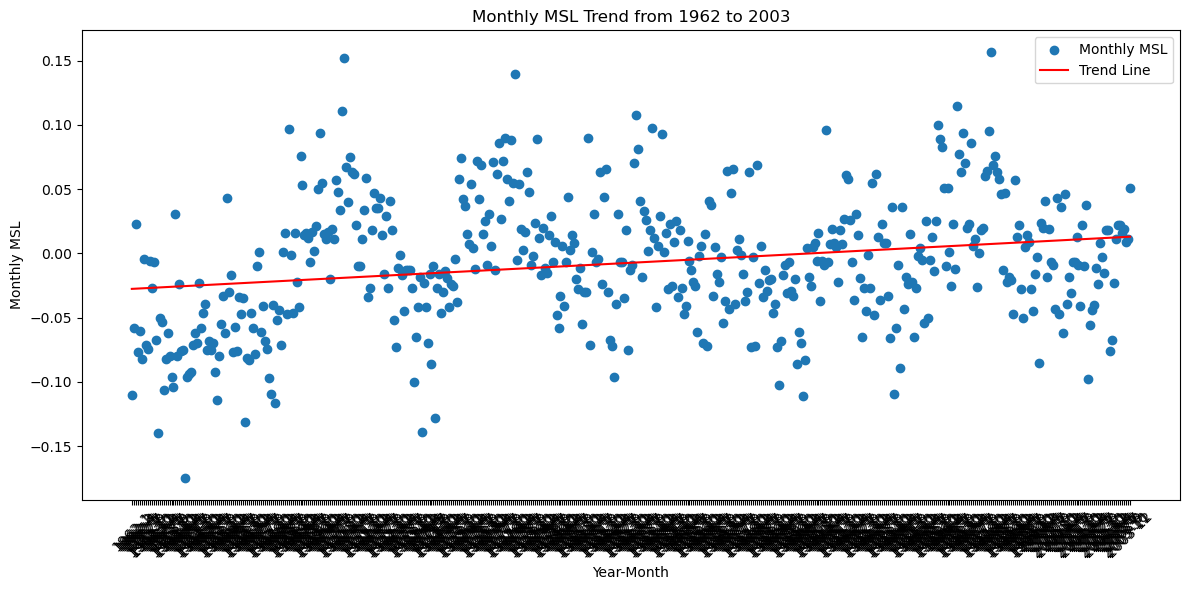

Equation of the trend line: y = 0.0001x + -0.0276
R^2 score: 0.0548


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# File path to your CSV file
file_path = r'D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\8418150_meantrend_PortlandTG.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Convert 'Year' and ' Month' columns to strings and combine them into a single column 'Year_Month'
df['Year_Month'] = df['Year'].astype(str) + '-' + df[' Month'].astype(str)

# Filter data for the specified time period (1962 to 2003)
df_filtered = df[(df['Year'] >= 1962) & (df['Year'] <= 2003)]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Year_Month'], df_filtered[' Monthly_MSL'], label='Monthly MSL', marker='o')

# Perform linear regression
model = LinearRegression()
X = np.arange(len(df_filtered)).reshape(-1, 1)
model.fit(X, df_filtered[' Monthly_MSL'])
y_pred = model.predict(X)
plt.plot(df_filtered['Year_Month'], y_pred, color='red', label='Trend Line')

# Formatting
plt.title('Monthly MSL Trend from 1962 to 2003')
plt.xlabel('Year-Month')
plt.ylabel('Monthly MSL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Calculate R^2 score
r2 = model.score(X, df_filtered[' Monthly_MSL'])
print(f"Equation of the trend line: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
print(f"R^2 score: {r2:.4f}")


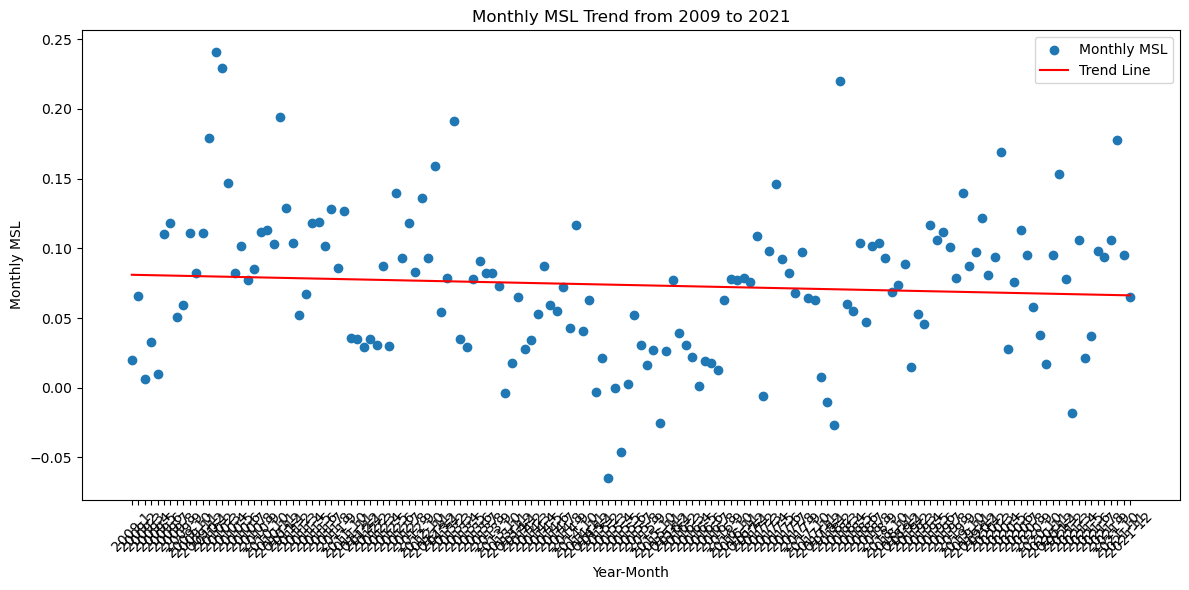

Equation of the trend line: y = -0.0001x + 0.0810
R^2 score: 0.0069


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# File path to your CSV file
file_path = r'D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\8418150_meantrend_PortlandTG.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Convert 'Year' and ' Month' columns to strings and combine them into a single column 'Year_Month'
df['Year_Month'] = df['Year'].astype(str) + '-' + df[' Month'].astype(str)

# Filter data for the specified time period (2009 to 2021)
df_filtered = df[(df['Year'] >= 2009) & (df['Year'] <= 2021)]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Year_Month'], df_filtered[' Monthly_MSL'], label='Monthly MSL', marker='o')

# Perform linear regression
model = LinearRegression()
X = np.arange(len(df_filtered)).reshape(-1, 1)
model.fit(X, df_filtered[' Monthly_MSL'])
y_pred = model.predict(X)
plt.plot(df_filtered['Year_Month'], y_pred, color='red', label='Trend Line')

# Formatting
plt.title('Monthly MSL Trend from 2009 to 2021')
plt.xlabel('Year-Month')
plt.ylabel('Monthly MSL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Calculate R^2 score
r2 = model.score(X, df_filtered[' Monthly_MSL'])
print(f"Equation of the trend line: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
print(f"R^2 score: {r2:.4f}")


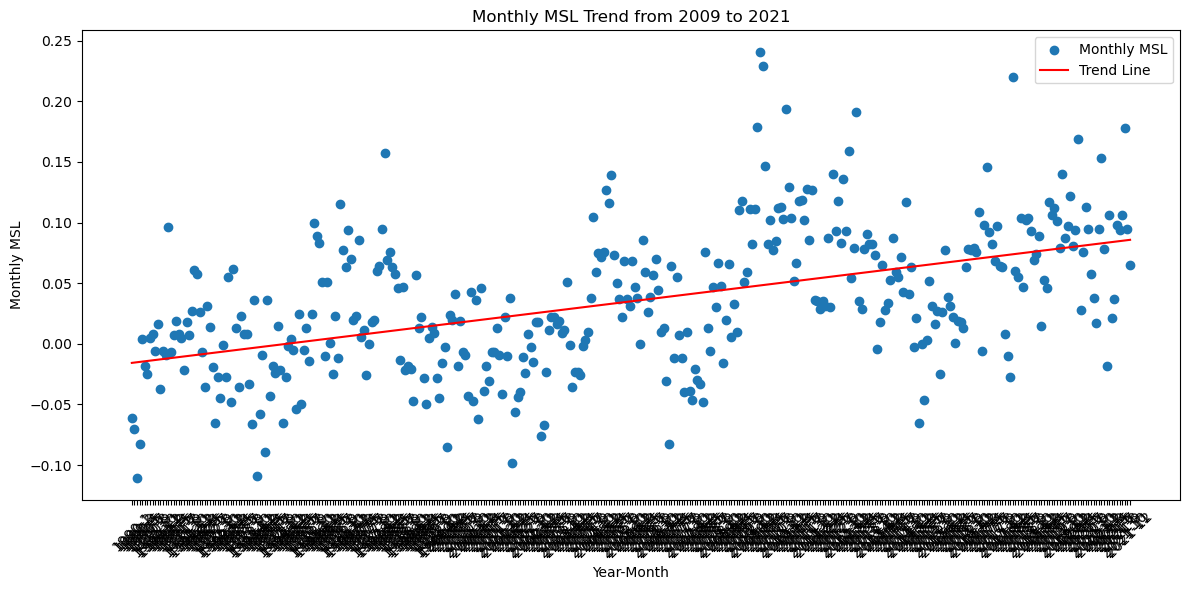

Equation of the trend line: y = 0.0003x + -0.0157
R^2 score: 0.2550


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# File path to your CSV file
file_path = r'D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\8418150_meantrend_PortlandTG.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Convert 'Year' and ' Month' columns to strings and combine them into a single column 'Year_Month'
df['Year_Month'] = df['Year'].astype(str) + '-' + df[' Month'].astype(str)

# Filter data for the specified time period (2009 to 2021)
df_filtered = df[(df['Year'] >= 1990) & (df['Year'] <= 2021)]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Year_Month'], df_filtered[' Monthly_MSL'], label='Monthly MSL', marker='o')

# Perform linear regression
model = LinearRegression()
X = np.arange(len(df_filtered)).reshape(-1, 1)
model.fit(X, df_filtered[' Monthly_MSL'])
y_pred = model.predict(X)
plt.plot(df_filtered['Year_Month'], y_pred, color='red', label='Trend Line')

# Formatting
plt.title('Monthly MSL Trend from 2009 to 2021')
plt.xlabel('Year-Month')
plt.ylabel('Monthly MSL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Calculate R^2 score
r2 = model.score(X, df_filtered[' Monthly_MSL'])
print(f"Equation of the trend line: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
print(f"R^2 score: {r2:.4f}")


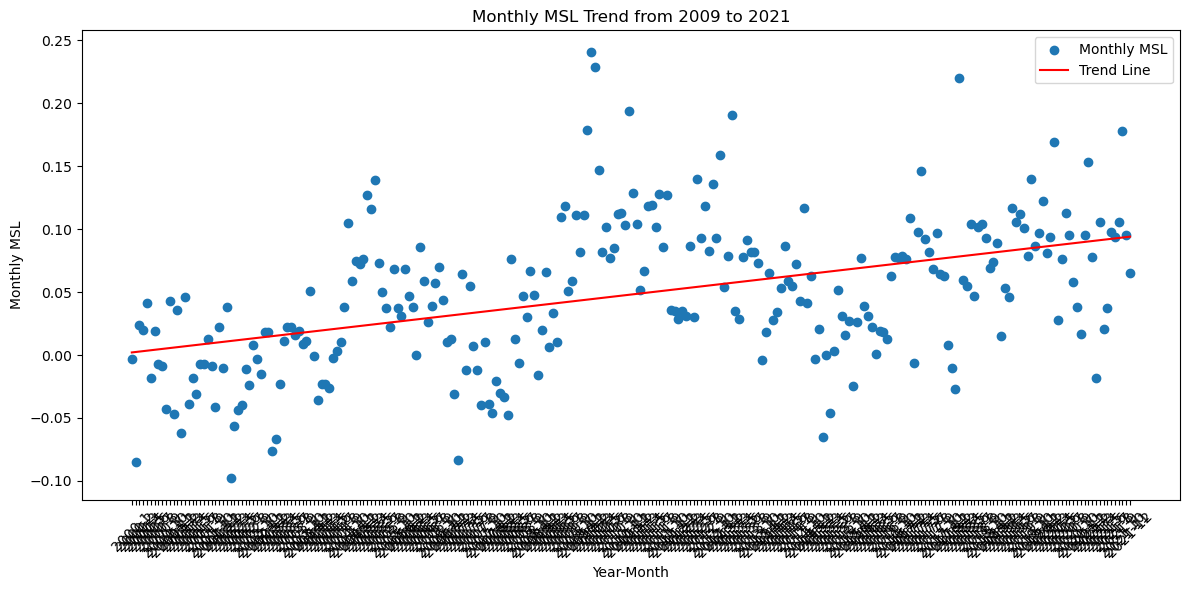

Equation of the trend line: y = 0.0003x + 0.0021
R^2 score: 0.2113


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# File path to your CSV file
file_path = r'D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\8418150_meantrend_PortlandTG.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Convert 'Year' and ' Month' columns to strings and combine them into a single column 'Year_Month'
df['Year_Month'] = df['Year'].astype(str) + '-' + df[' Month'].astype(str)

# Filter data for the specified time period (2009 to 2021)
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2021)]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Year_Month'], df_filtered[' Monthly_MSL'], label='Monthly MSL', marker='o')

# Perform linear regression
model = LinearRegression()
X = np.arange(len(df_filtered)).reshape(-1, 1)
model.fit(X, df_filtered[' Monthly_MSL'])
y_pred = model.predict(X)
plt.plot(df_filtered['Year_Month'], y_pred, color='red', label='Trend Line')

# Formatting
plt.title('Monthly MSL Trend from 2009 to 2021')
plt.xlabel('Year-Month')
plt.ylabel('Monthly MSL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Calculate R^2 score
r2 = model.score(X, df_filtered[' Monthly_MSL'])
print(f"Equation of the trend line: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
print(f"R^2 score: {r2:.4f}")


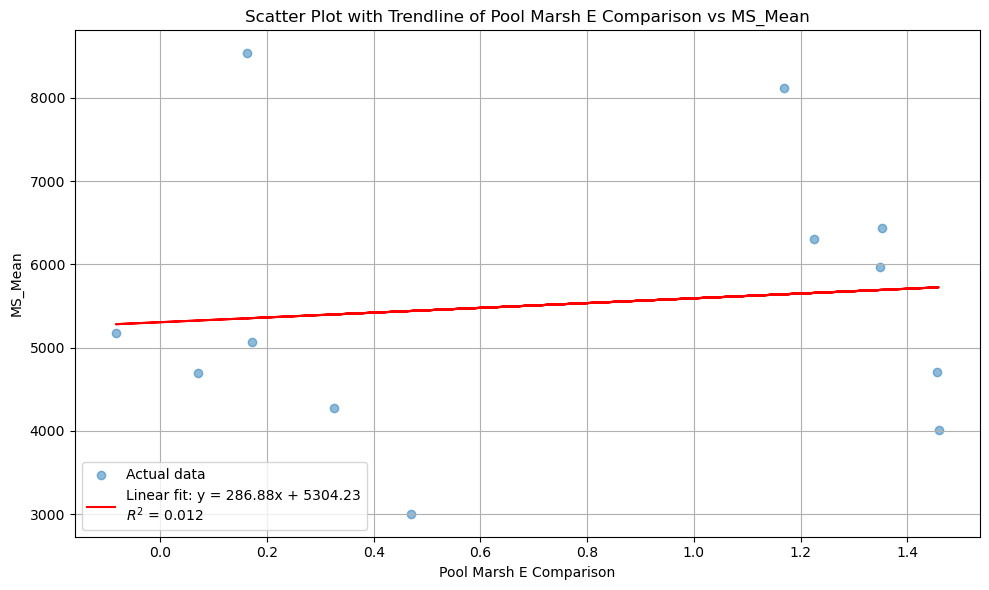

Equation of the trendline: y = 286.88x + 5304.23
R^2 value: 0.012


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# File path
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\ELEVATION_DATA_STATS.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extracting columns for scatter plot
x = df['Pool Marsh E Comparison'].values.reshape(-1, 1)  # Reshape for sklearn input format
y = df['MS_Mean'].values

# Perform linear regression
model = LinearRegression()
model.fit(x, y)

# Predicted values
y_pred = model.predict(x)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual data')
plt.plot(x, y_pred, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r2:.3f}')
plt.title('Scatter Plot with Trendline of Pool Marsh E Comparison vs MS_Mean')
plt.xlabel('Pool Marsh E Comparison')
plt.ylabel('MS_Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print the equation and R^2 value
print(f"Equation of the trendline: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2 value: {r2:.3f}")


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# File path
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\ELEVATION_DATA_STATS.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extracting columns for scatter plot
x = df['Pool_Mean_Elevation'].values.reshape(-1, 1)  # Reshape for sklearn input format
y = df['MS_Mean'].values

# Perform linear regression
model = LinearRegression()
model.fit(x, y)

# Predicted values
y_pred = model.predict(x)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual data')
plt.plot(x, y_pred, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r2:.3f}')
plt.title('Scatter Plot with Trendline of Pool_Mean_Elevation vs MS_Mean')
plt.xlabel('Pool_Mean_Elevation')
plt.ylabel('MS_Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print the equation and R^2 value
print(f"Equation of the trendline: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2 value: {r2:.3f}")


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# File path
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\ELEVATION_DATA_STATS.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extracting columns for scatter plot
x = df['Pool_Mean_Elevation'].values.reshape(-1, 1)  # Reshape for sklearn input format
y = df['IP_Mean'].values

# Perform linear regression
model = LinearRegression()
model.fit(x, y)

# Predicted values
y_pred = model.predict(x)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual data')
plt.plot(x, y_pred, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r2:.3f}')
plt.title('Scatter Plot with Trendline of Pool_Mean_Elevation vs IP_Mean')
plt.xlabel('Pool_Mean_Elevation')
plt.ylabel('IP_Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print the equation and R^2 value
print(f"Equation of the trendline: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2 value: {r2:.3f}")


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# File path
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\POOLELEVATIONS\these are 0.1\PoolEle_floatEle\ELEVATION_DATA_STATS.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Replace NaN values in 'PP_Mean' column with 0
df['PP_Mean'].fillna(0, inplace=True)

# Extracting columns for scatter plot
x = df['Pool_Mean_Elevation'].values.reshape(-1, 1)  # Reshape for sklearn input format
y = df['PP_Mean'].values

# Perform linear regression
model = LinearRegression()
model.fit(x, y)

# Predicted values
y_pred = model.predict(x)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual data')
plt.plot(x, y_pred, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r2:.3f}')
plt.title('Scatter Plot with Trendline of Pool_Mean_Elevation vs PP_Mean')
plt.xlabel('Pool_Mean_Elevation')
plt.ylabel('PP_Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print the equation and R^2 value
print(f"Equation of the trendline: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2 value: {r2:.3f}")
